In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('PlayTennis.csv')
data

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [3]:
data.describe

<bound method NDFrame.describe of      Outlook Temperature Humidity    Wind Play Tennis
0      Sunny         Hot     High    Weak          No
1      Sunny         Hot     High  Strong          No
2   Overcast         Hot     High    Weak         Yes
3       Rain        Mild     High    Weak         Yes
4       Rain        Cool   Normal    Weak         Yes
5       Rain        Cool   Normal  Strong          No
6   Overcast        Cool   Normal  Strong         Yes
7      Sunny        Mild     High    Weak          No
8      Sunny        Cool   Normal    Weak         Yes
9       Rain        Mild   Normal    Weak         Yes
10     Sunny        Mild   Normal  Strong         Yes
11  Overcast        Mild     High  Strong         Yes
12  Overcast         Hot   Normal    Weak         Yes
13      Rain        Mild     High  Strong          No>

# Entropy

In [4]:
def entropy(dataFrame):
    yes_count = (dataFrame['Play Tennis'] == 'Yes').sum()
    no_count = len(dataFrame) - yes_count

    if(yes_count==0 or no_count==0):
        return 0

    entropy = -(yes_count/len(dataFrame))*np.log2(yes_count/len(dataFrame)) - (no_count/len(dataFrame))*np.log2(no_count/len(dataFrame)) 
    return entropy
    
print(entropy(data))

0.9402859586706311


# Average Entropy

In [5]:
def average_entropy(data,columnName):
    avgEntropy = 0
    uniqueValues = data[columnName].unique()
    for i in range(len(uniqueValues)):
        newDf = data[data[columnName] == uniqueValues[i]]
        fraction = len(newDf)/len(data)
        avgEntropy = avgEntropy +(fraction*entropy(newDf))

    return avgEntropy

print(average_entropy(data,'Outlook'))

0.6935361388961918


# Information Gain

In [6]:
def information_gain(data,columnName):
    gain = entropy(data) - average_entropy(data,columnName)

    return gain
print(information_gain(data,'Outlook'))

0.24674981977443933


# Max Gain

In [7]:
def max_gain(dataFrame):
    infoGain = []
    for key in dataFrame.keys()[:-1]:
        infoGain.append(information_gain(dataFrame,key))
        
    return dataFrame.keys()[:-1][np.argmax(infoGain)]

print(max_gain(data))

Outlook


# Build Tree

In [8]:
def buildTree(dataFrame): 
    tree = None
    target = dataFrame.keys()[-1]   
    node = max_gain(dataFrame)
    uniqueVals = np.unique(dataFrame[node])

    if tree is None:
        tree={}
        tree[node] = {}

    for value in uniqueVals:
        subtable = dataFrame[dataFrame[node] == value].reset_index(drop=True)
        clValue,counts = np.unique(subtable[target],return_counts=True)

        # if pure then it is a leaf node
        if len(counts)==1:
            tree[node][value] = clValue[0]
        else:
            tree[node][value] = buildTree(subtable) 

    return tree

In [9]:
tree = buildTree(data)
print(tree)

{'Outlook': {'Overcast': 'Yes', 'Rain': {'Wind': {'Strong': 'No', 'Weak': 'Yes'}}, 'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}}}


# Plotting the Tree

In [10]:
from graphviz import Digraph
from IPython.display import display
from graphviz import Source

def plot_tree(tree, parent_name='', edge_label='', counter=0):
    counter += 1
    if isinstance(tree, str):  
        node_name = f'node{counter}'
        graph.node(node_name, label=tree, shape='ellipse')
        graph.edge(parent_name, node_name, label=edge_label)
        return counter

    for feature in tree:
        node_name = f'node{counter}'
        graph.node(node_name, label=feature, shape='box')
        if parent_name:
            graph.edge(parent_name, node_name, label=edge_label)
        for value in tree[feature]:
            counter = plot_tree(tree[feature][value], node_name, str(value), counter)

    return counter

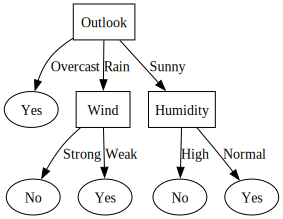

In [11]:
graph = Digraph()
plot_tree(tree)
graph.view()

dot_format = graph.source
s = Source(dot_format, filename="test.gv", format="png")
display(s)